<a href="https://colab.research.google.com/github/ASMITHAVARSHA/Sentiment-Analysis-of-Amazon-Product-Reviews/blob/main/Sentiment_Analysis_of_Amazon_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Download NLTK tools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
#Loading the dataset
data=pd.read_excel('/content/Amazon-reivew-export (3).xlsx')
data.head()

,Star-rating,Name,Review Title,Review Content,Date
0,4,Candice B,Battery life not as good as I'd hoped for,I bought my current XS refurbished from Amazon...,"April 6, 2023"
1,5,one single bean,good value for the money,"for the day that i had it, i liked it. came wi...","April 15, 2023"
2,5,CACGH,Very happy with this purchase.,Like New.\nOver the years I have purchased man...,"March 29, 2023"
3,5,D. Edwards,Extremely impressed so far.,I am very pleased with this unlocked iPhone 12...,"April 1, 2023"
4,5,MBH,"Pristine condition, better than expected batt...",I ordered a refurbished phone from another Int...,"April 4, 2023"


In [6]:
#Check for null values
data.isnull().sum()

,0
Star-rating,0
Name,1
Review Title,0
Review Content,18
Date,0


In [7]:
#Dropping and filling null value with anonymous values
data['Name'].fillna('Anonymous', inplace=True)
data= data.dropna(subset=['Review Content'])

In [8]:
#Again check for null values
data.isnull().sum()

,0
Star-rating,0
Name,0
Review Title,0
Review Content,0
Date,0


In [9]:
#Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 0 to 1851
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Star-rating     1834 non-null   int64 
 1   Name            1834 non-null   object
 2   Review Title    1834 non-null   object
 3   Review Content  1834 non-null   object
 4   Date            1834 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.0+ KB


In [10]:
#Statistical summary of data
data.describe()

,Star-rating
count,1834.000000
mean,3.765540
std,1.608282
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
#Text pre-processing using NLP tools
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace

    # Tokenization
    tokens = word_tokenize(text)

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)
data['Processed_Review'] = data['Review Content'].apply(preprocess_text)
print(data['Processed_Review'].head())


0    bought current xs refurbished amazon years ago...
1    day liked came scratches scuffs battery capaci...
2    like new years purchased many new used iphones...
3    pleased unlocked iphone far right box looks fe...
4    ordered refurbished phone another internet ret...
Name: Processed_Review, dtype: object


In [33]:
#Set sentiment values
def create_sentiment_label(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [34]:
data['Sentiment'] = data['Star-rating'].apply(create_sentiment_label)

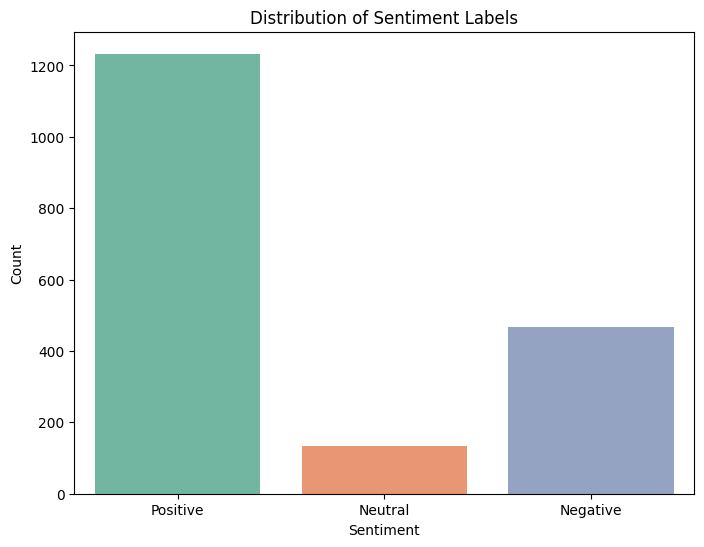

In [36]:
#Visualization of sentiment labels
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=data, palette='Set2')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

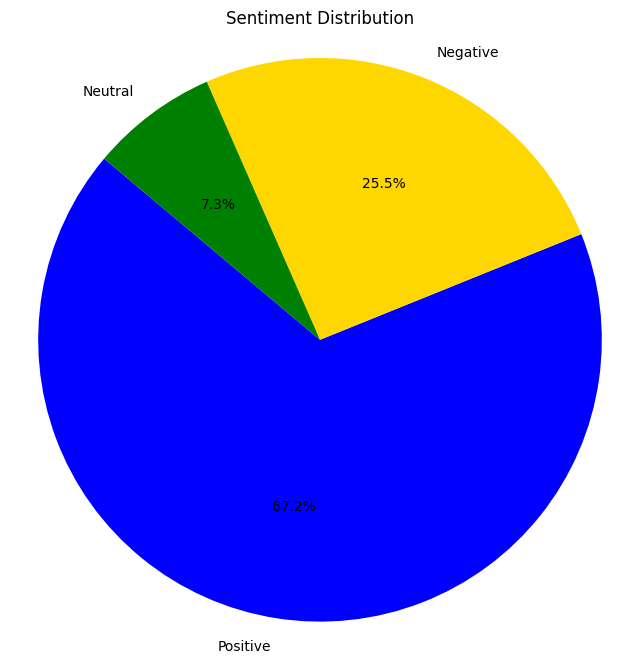

In [42]:
# Pie chart for Sentiment Label Distribution
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'gold', 'green'])
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

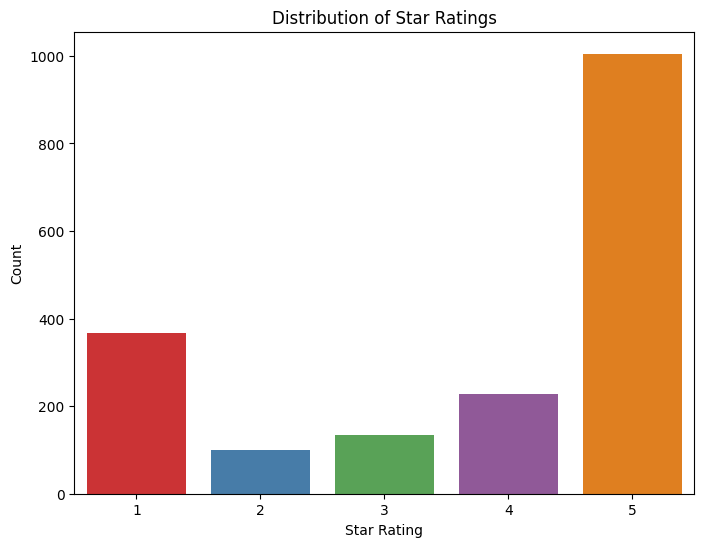

In [37]:
#Visualization for Star Ratings
plt.figure(figsize=(8,6))
sns.countplot(x='Star-rating', data=data, palette='Set1')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

In [43]:
#Split data into features and targets
x=data['Processed_Review']
y=data['Sentiment']

In [45]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [47]:
#TF-IDF Vectorization to convert text to vectors
tfidf = TfidfVectorizer(max_features=1000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)


In [57]:
#Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(x_train_tfidf, y_train)
lr_predictions = lr_model.predict(x_test_tfidf)
lr_accuracy=accuracy_score(y_test,lr_predictions)
print(f'Logistic Regression Accuracy:{lr_accuracy}')

Logistic Regression Accuracy:0.7929155313351499


In [58]:
#Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_tfidf, y_train)
dt_predictions = dt_model.predict(x_test_tfidf)
dt_accuracy=accuracy_score(y_test,dt_predictions)
print(f'Decision Tree Accuracy:{dt_accuracy}')

Decision Tree Accuracy:0.7084468664850136


              precision    recall  f1-score   support

    Negative       0.73      0.61      0.67        88
     Neutral       0.00      0.00      0.00        32
    Positive       0.81      0.96      0.88       247

    accuracy                           0.79       367
   macro avg       0.51      0.52      0.51       367
weighted avg       0.72      0.79      0.75       367



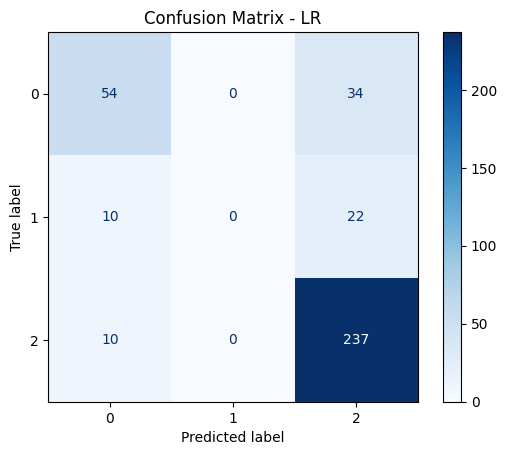

In [77]:
#Confusion matrix of LR with all sentiment labels
print(classification_report(y_test,lr_predictions))
cm_lr = confusion_matrix(y_test, lr_predictions)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title('Confusion Matrix - LR')
plt.show()

              precision    recall  f1-score   support

    Negative       0.52      0.52      0.52        88
     Neutral       0.18      0.06      0.09        32
    Positive       0.79      0.86      0.82       247

    accuracy                           0.71       367
   macro avg       0.50      0.48      0.48       367
weighted avg       0.67      0.71      0.69       367



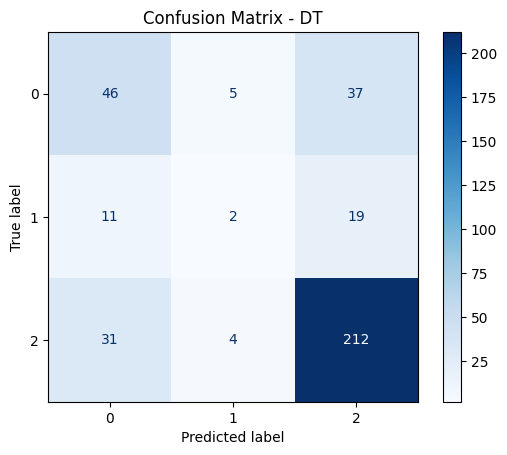

In [76]:
#Confusion matrix of DT with all sentiment labels
print(classification_report(y_test,dt_predictions))
cm_dt = confusion_matrix(y_test, dt_predictions)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap='Blues')
plt.title('Confusion Matrix - DT')
plt.show()

              precision    recall  f1-score   support

    Negative       0.73      0.61      0.67        88
     Neutral       0.00      0.00      0.00        32
    Positive       0.81      0.96      0.88       247

    accuracy                           0.79       367
   macro avg       0.51      0.52      0.51       367
weighted avg       0.72      0.79      0.75       367



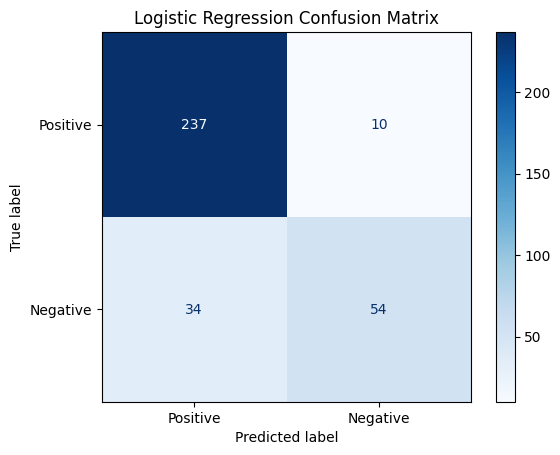

In [70]:
#Confusion matrix of LR with only positive and negative labels
data_binary = data[data['Sentiment'] != 'Neutral']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test,lr_predictions))
cm_lr = confusion_matrix(y_test, lr_predictions, labels=['Positive', 'Negative'])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Positive', 'Negative'])
disp_lr.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

    Negative       0.52      0.52      0.52        88
     Neutral       0.18      0.06      0.09        32
    Positive       0.79      0.86      0.82       247

    accuracy                           0.71       367
   macro avg       0.50      0.48      0.48       367
weighted avg       0.67      0.71      0.69       367



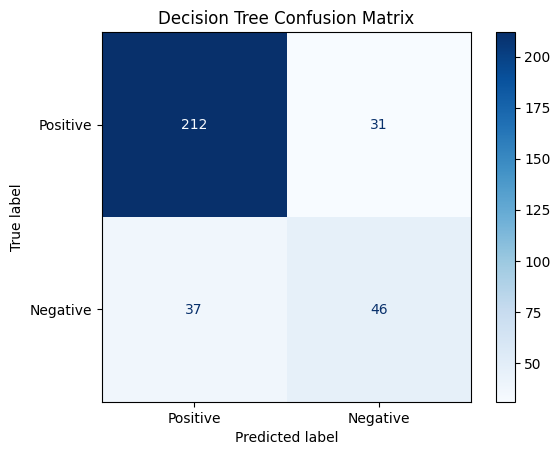

In [71]:
#Confusion matrix of DT with only positive and negative labels
print(classification_report(y_test,dt_predictions))
cm_dt = confusion_matrix(y_test, dt_predictions, labels=['Positive', 'Negative'])
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Positive', 'Negative'])
disp_dt.plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()